In [1]:
import numpy as np
import pandas as pd

In [2]:
RandomNumber = np.random.choice([1,2,3,4,5],
                               size = 100,replace = True,
                               p = [0.1,0.1,0.3,0.3,0.2])


In [3]:
RandomNumber

array([3, 5, 4, 3, 4, 1, 3, 3, 4, 2, 5, 1, 5, 3, 5, 3, 2, 2, 5, 3, 3, 3, 3,
       3, 4, 4, 3, 1, 3, 5, 3, 3, 4, 2, 4, 4, 5, 5, 4, 3, 4, 5, 3, 5, 1, 2,
       4, 4, 1, 3, 4, 5, 4, 4, 4, 5, 3, 3, 5, 4, 4, 3, 4, 4, 5, 2, 4, 3, 2,
       4, 3, 4, 5, 4, 2, 4, 1, 4, 4, 4, 1, 1, 2, 3, 2, 2, 3, 3, 4, 5, 4, 4,
       4, 1, 4, 3, 5, 4, 3, 4])

In [4]:
pd.Series(RandomNumber).value_counts()

4    35
3    28
5    17
2    11
1     9
dtype: int64

In [5]:
pd.Series(RandomNumber).value_counts()/100

4    0.35
3    0.28
5    0.17
2    0.11
1    0.09
dtype: float64

In [6]:
#读取沪深300的收益率数据

In [7]:
HSRet300 = pd.read_csv('014\\return300.csv')
HSRet300.head(n = 2)

,date,return,sig
0,2014/1/2,-0.3454,0
1,2014/1/3,-1.3436,0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']

In [9]:
from scipy import stats

In [10]:
density = stats.kde.gaussian_kde(HSRet300.iloc[:,1])

In [15]:
HSRet300.iloc[:,1]

0     -0.3454
1     -1.3436
2     -2.2762
3     -0.0284
4      0.1747
5     -0.8783
6     -0.7817
7     -0.5067
8      0.8737
9     -0.1765
10     0.1314
11    -1.5081
12    -0.5736
13     0.9888
14     2.5778
15    -0.5307
16     0.6178
17    -1.3252
18     0.1776
19     0.3571
20    -1.1371
21     0.4555
22     2.4882
23     0.7950
24     0.2487
25    -0.5103
26     0.7028
27     0.7001
28    -1.2634
29     1.1485
        ...  
215   -0.0049
216    1.8271
217    2.5471
218    1.3703
219    1.3948
220    1.1558
221    1.9724
222    0.3914
223    3.6927
224    1.4914
225    4.6099
226    0.6615
227    4.0960
228   -4.4873
229    3.6896
230   -1.1961
231    0.3209
232    0.7516
233    2.6785
234    1.7314
235   -0.4366
236    1.1130
237    0.3344
238   -2.0491
239   -2.8433
240    3.2514
241    3.3105
242    0.2791
243    0.0607
244    2.2025
Name: return, Length: 245, dtype: float64

In [16]:
type(HSRet300.iloc[:,1])

pandas.core.series.Series

In [11]:
density

In [12]:
print(density)

In [13]:
bins = np.arange(-5,5,0.02)#设定分割区间

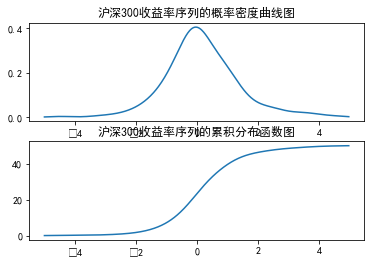

In [14]:
plt.subplot(211)
plt.plot(bins,density(bins))
plt.title('沪深300收益率序列的概率密度曲线图')
plt.subplot(212)
plt.plot(bins,density(bins).cumsum())
plt.title('沪深300收益率序列的累积分布函数图')

In [17]:
#生成二项分布

In [18]:
np.random.binomial(100,0.5,20)

array([51, 38, 54, 57, 50, 48, 48, 50, 53, 43, 59, 49, 53, 45, 50, 55, 54,
       53, 44, 49])

In [20]:
np.random.binomial(10,0.5,3)#10次伯努利实验，取值为1的概率0.5，产生3个数

array([2, 7, 5])

In [21]:
#以上，第一次实验投10次，2次向上

In [26]:
#求100次试验，有20次正面向上的概率值
stats.binom.pmf(20,100,0.5)

4.2281632676012532e-10

In [27]:
#求100次试验，有50次正面向上的概率值
stats.binom.pmf(50,100,0.5)

0.079589237387178879

In [29]:
#我们先求出正面向上分别为0,1,2.。。次的概率
dd = stats.binom.pmf(np.arange(0,21,1),100,0.5)

In [30]:
dd

array([  7.88860905e-31,   7.88860905e-29,   3.90486148e-27,
         1.27558808e-25,   3.09330110e-24,   5.93913812e-23,
         9.40363535e-22,   1.26277389e-20,   1.46797465e-19,
         1.50059631e-18,   1.36554264e-17,   1.11726216e-16,
         8.28636101e-16,   5.60922899e-15,   3.48573516e-14,
         1.99848816e-13,   1.06169683e-12,   5.24603142e-12,
         2.41900338e-11,   1.04399093e-10,   4.22816327e-10])

In [31]:
#接着，我们将这些概率值相加
#求100次试验中正面朝上的次数小于等于20次的概率
stats.binom.cdf(20,100,0.5)

5.5795445286259747e-10

In [32]:
#获取2014年沪深300的收益率数据
ret = HSRet300.iloc[:,1]
ret.head()

0   -0.3454
1   -1.3436
2   -2.2762
3   -0.0284
4    0.1747
Name: return, dtype: float64

In [34]:
#估算沪深300上涨的概率p
p = len(ret[ret>0])/len(ret)
p

0.5306122448979592

In [35]:
#估计10个交易日中，有6个交易日中上涨的概率

In [37]:
prob = stats.binom.pmf(6,10,p)
prob

0.2275149431566236

In [38]:
#生成5个标准正态分布随机数
Norm = np.random.normal(size = 5)
Norm

array([ 1.91614543,  0.2252678 ,  0.30127711,  0.07624329, -1.90826397])

In [39]:
#求生成正态分布随机数的密度值
stats.norm.pdf(Norm)

array([ 0.06362523,  0.38894734,  0.38124141,  0.39778443,  0.06459139])

In [40]:
#求生成的正态分布随机数的累积密度值
stats.norm.cdf(Norm)

array([ 0.97232671,  0.58911452,  0.6183984 ,  0.53038723,  0.02817855])

In [41]:
#获得沪深指数300收益率序列的均值和方差
HS300_RetMean = ret.mean()
HS300_RetMean

0.17742367346938773

In [43]:
HS300_RetVariance = ret.var()
HS300_RetVariance

1.4712059348471052

In [44]:
#查询累积密度值为0.05的分位数
stats.norm.ppf(0.05,HS300_RetMean,HS300_RetVariance**0.5)

-1.8176732130631714

In [45]:
#卡方分布
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

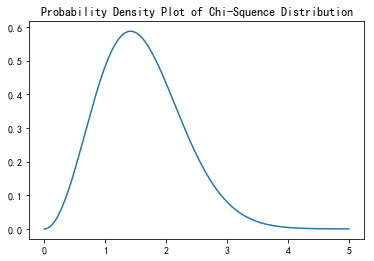

In [47]:
plt.plot(np.arange(0,5,0.002),\
         stats.chi.pdf(np.arange(0,5,0.002),3))
plt.title('Probability Density Plot of Chi-Squence Distribution')

In [48]:
#读取数据
TRD_Index = pd.read_table('014/TRD_Index.txt',sep = '\t')

In [49]:
#获取上证综指数据，代码为‘000001’

In [51]:
SHindex = TRD_Index[TRD_Index.Indexcd==1]
SHindex.head(3)

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
0,1,2009-01-05,1,1849.020,1880.716,1844.094,1880.716,0.032904
1,1,2009-01-06,2,1878.827,1938.690,1871.971,1937.145,0.030004
2,1,2009-01-07,3,1938.974,1948.233,1920.515,1924.012,-0.006780


In [52]:
#获取深证综合指数数据，代码为‘399106’

In [53]:
SZindex = TRD_Index[TRD_Index.Indexcd == 399106]
SZindex.head(3)

,Indexcd,Trddt,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
13012,399106,2009-01-05,1,560.097,571.134,557.687,571.134,0.032230
13013,399106,2009-01-06,2,569.278,587.676,566.723,586.332,0.026610
13014,399106,2009-01-07,3,585.504,590.658,582.341,584.705,-0.002775


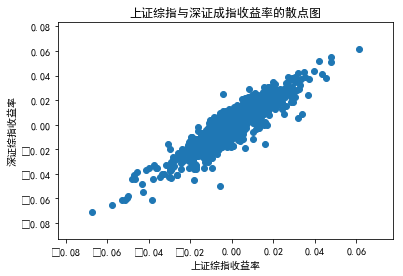

In [58]:
#绘制上证综指与深证综指收益率的散点图
plt.scatter(SHindex.Retindex,SZindex.Retindex)
plt.title('上证综指与深证成指收益率的散点图')
plt.xlabel('上证综指收益率')
plt.ylabel('深证综指收益率')

In [59]:
#计算上证综指与深证综指收益率的相关系数
SZindex.index = SHindex.index
SZindex.Retindex.corr(SHindex.Retindex)

0.90827763480145474

In [60]:
#习题

In [61]:
# -*- coding: utf-8 -*-

import pandas as pd

In [65]:
Bwages = pd.read_csv('Data/Part2/002/Bwages.csv')#比利时国1472个工人的工资数据
Bwages.head(5)

,wage,educ,exper
0,7.780208,1,23
1,4.818505,1,15
2,10.563645,1,31
3,7.042429,1,32
4,7.887521,1,9


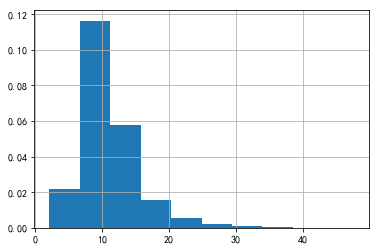

In [66]:
Bwages.wage.hist(normed=True)#wage的频率直方图

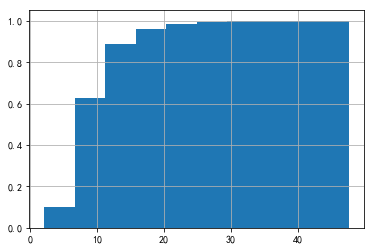

In [67]:
Bwages.wage.hist(normed=True,cumulative=True)#wage的累积分布直方图

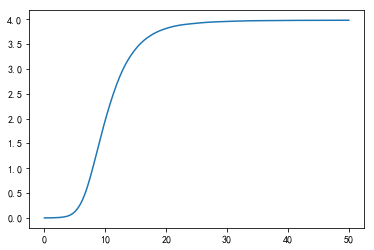

In [68]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
kde = stats.gaussian_kde(Bwages.wage)
bins=np.linspace(0, 50, num=200)
plt.plot(bins,kde(bins).cumsum())#累积分布函数

In [69]:
#?stats.gaussian_kde 高斯分布

In [70]:
kde

In [71]:
#2.
history = pd.read_csv('Data/Part2/001/history.csv',
                      index_col = 'Date')

In [72]:
history.head()

,Convertible.Arbitrage,CTA.Global,Distressed.Securities,Emerging.Markets,Equity.Market.Neutral,Event.Driven,Fixed.Income.Arbitrage,Global.Macro,Long.Short.Equity,Merger.Arbitrage,Relative.Value,Short.Selling
Date,,,,,,,,,,,,
1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166
1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426
1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778
1997-04-30,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129
1997-05-31,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737


In [75]:
revenue=len(history['Emerging.Markets'][history['Emerging.Markets']>0])#这种写法不错
revenue

105

In [76]:
loss=len(history['Emerging.Markets'][history['Emerging.Markets']<0])
loss

47

In [78]:
p=revenue/(revenue+loss)
p

0.6907894736842105

In [79]:
1-stats.binom.cdf(6,12,p)

0.86700957009568247

In [80]:
#3.
from math import sqrt
norm_bins=np.linspace(-5, 5, num=200)#产生等间距x轴数据

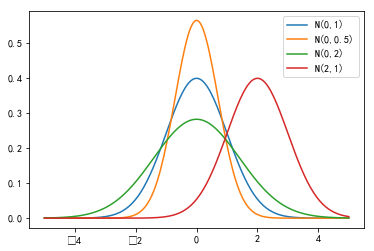

In [82]:
plt.plot(norm_bins,stats.norm.pdf(norm_bins,0,1),label='N(0,1)')

plt.plot(norm_bins,stats.norm.pdf(norm_bins,0,sqrt(0.5)),
         label='N(0,0.5)')

plt.plot(norm_bins,stats.norm.pdf(norm_bins,0,sqrt(2)),label='N(0,2)')

plt.plot(norm_bins,stats.norm.pdf(norm_bins,2,1),label='N(2,1)')

plt.legend()

In [83]:
#5.
import numpy as np
sample = np.random.exponential(2,10000)

In [84]:
sample.mean()

2.0033303539295284

In [85]:
sample.var()

3.9493302820996803

In [86]:
#6
import matplotlib.pyplot as plt
log_bins=np.linspace(0, 10, num=200)

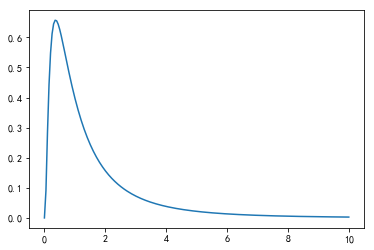

In [87]:
plt.plot(log_bins,stats.lognorm.pdf(log_bins,1,0,1))